# Eigenfaces a

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from numpy.linalg import matrix_rank
from numpy.linalg import inv

mat_content = sio.loadmat('face.mat')

face_data = mat_content['X']
face_id = mat_content['l']

print(face_data)
print(face_data.shape)

print(face_id)
print(face_id.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 37  40  22 ...  87 102  93]
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]]
(2576, 520)
[[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
   3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
   5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
   8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
  10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
  13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
  15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
  17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
  20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
  22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
  25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 

In [4]:
# Split data set
# Train_id is the index of each train data in the total data set, test_id the same

from sklearn.model_selection import train_test_split

indices = np.arange(len(face_id[0]))
train_data, test_data, train_id, test_id = train_test_split(face_data.T, indices, test_size = 0.2)
train_data = train_data.T
test_data = test_data.T

print(train_data)
print(train_data.shape)
print(test_data)
print(test_data.shape)

[[116 162  87 ... 104  64 194]
 [129 158  88 ... 105  55 131]
 [141 157  71 ... 104  55 110]
 ...
 [ 48  38  34 ...  20 169 160]
 [ 49  33  27 ...  22 169  38]
 [ 48  33  37 ...  25 168  38]]
(2576, 416)
[[155 141 147 ... 156  74 116]
 [149 151 152 ... 158  76 112]
 [133 158 155 ... 161  75 103]
 ...
 [105  23 117 ...  55 224  43]
 [ 82  21 104 ...  44 221  45]
 [ 57  20  99 ...  37 221  49]]
(2576, 104)


In [5]:
# Count the number of face images for each person 
# in the train and test set after randomly split

train_label = face_id[0,train_id]
unique_train, counts_train = np.unique(train_label, return_counts=True)
dict(zip(unique_train, counts_train))

#test_label = face_id[0,test_id]
#unique_test, counts_test = np.unique(test_label, return_counts=True)
#dict(zip(unique_test, counts_test))

#print(unique_train)
#print(train_label)
#print(counts_train)


{1: 8,
 2: 10,
 3: 10,
 4: 8,
 5: 8,
 6: 9,
 7: 9,
 8: 7,
 9: 9,
 10: 8,
 11: 10,
 12: 8,
 13: 8,
 14: 9,
 15: 7,
 16: 7,
 17: 10,
 18: 10,
 19: 5,
 20: 7,
 21: 6,
 22: 10,
 23: 9,
 24: 9,
 25: 8,
 26: 9,
 27: 7,
 28: 10,
 29: 7,
 30: 8,
 31: 7,
 32: 8,
 33: 8,
 34: 7,
 35: 9,
 36: 8,
 37: 7,
 38: 8,
 39: 8,
 40: 7,
 41: 7,
 42: 6,
 43: 7,
 44: 9,
 45: 7,
 46: 9,
 47: 9,
 48: 6,
 49: 7,
 50: 8,
 51: 6,
 52: 8}

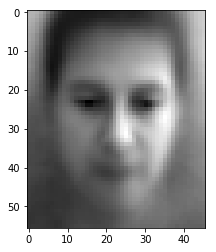

In [6]:
# Compute average face vector

num_train = len(train_data[0])

avg_face = train_data.mean(axis=1)

plt.imshow(np.reshape(avg_face,(46,56)).T, cmap = 'gist_gray')

#print(train_data.shape)
#print(num_train)

In [8]:
# Compute covariance matrix without low-dimensional compution

num_pix = len(train_data)

A = train_data - avg_face.reshape(num_pix,1)
S = (A.dot(A.T)) / num_train

#print(num_pix)

In [9]:
# Compute the egenvalues
# Due to numerical error, some eigenvalues are complex but they have
# negligible imaginary parts. Morover real symetric covariance 
# matrix always has real eigenvalues and eigenvectors.

eigvals, eigvecs = np.linalg.eig(S)
eigvals = eigvals.real
eigvecs = eigvecs.real

In [10]:
# Compute the nonzero eigenvalues and their eigenvectors

print(eigvals.shape)
print(eigvecs.shape)

nonzero_eigvals = eigvals[abs(eigvals) >= 1e-7]
print(nonzero_eigvals.shape)

eigvecs_nonzero_eigvals = eigvecs[:,abs(eigvals) >= 1e-7]
print(eigvecs_nonzero_eigvals.shape)

(2576,)
(2576, 2576)
(415,)
(2576, 415)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
(2576, 30)


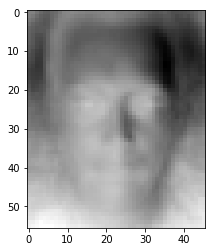

In [11]:
# Choose the eigenvectors with M largest eigenvalues as eigenfaces

M = 30 # Number of eigenvectors with M largest eigenvalues to be used

sorted_index = np.argsort(-nonzero_eigvals)[:M]
print(sorted_index)

eigfaces = eigvecs_nonzero_eigvals[:,sorted_index]
print(eigfaces.shape)

plt.imshow(np.reshape(eigfaces[:,0],(46,56)).T, cmap = 'gist_gray')

# Eigenfaces b

In [12]:
# Compute covariance matrix with low-dimensional compution

S_low_dim = ((A.T).dot(A)) / num_train

print(matrix_rank(A))
print(S.shape)
print(S_low_dim.shape)

415
(2576, 2576)
(416, 416)


In [14]:
# Compute the egenvalues 

eigvals_low_dim, eigvecs_low_dim = np.linalg.eig(S_low_dim)
eigvals_low_dim = eigvals_low_dim.real
eigvecs_low_dim = eigvecs_low_dim.real

In [15]:
# Compute the nonzero eigenvalues and their eigenvectors

print(eigvals_low_dim.shape)
print(eigvecs_low_dim.shape)

nonzero_eigvals_low_dim = eigvals_low_dim[abs(eigvals_low_dim) >= 1e-7]
print(nonzero_eigvals_low_dim.shape)

eigvecs_nonzero_eigvals_low_dim = eigvecs_low_dim[:,abs(eigvals_low_dim) >= 1e-7]
print(eigvecs_nonzero_eigvals_low_dim.shape)

(416,)
(416, 416)
(415,)
(416, 415)


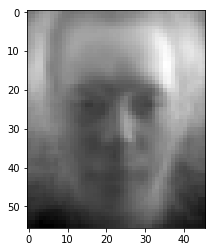

In [16]:
# Choose the eigenvectors with M largest eigenvalues as eigenfaces and 
# convert them to the eigenvectors of S and normalize them

eigfaces_low_dim_unnormalized = A.dot(eigvecs_nonzero_eigvals_low_dim[:,np.argsort(-nonzero_eigvals_low_dim)[:M]])

eigfaces_low_dim = (preprocessing.normalize(eigfaces_low_dim_unnormalized.T, norm='l2')).T

#print(eigfaces_low_dim[:,0])
#print(eigfaces[:,0])
#print(eigfaces_low_dim.shape)

plt.imshow(np.reshape(eigfaces_low_dim[:,0],(46,56)).T, cmap = 'gist_gray')

# PCA-LAD

In [17]:
sorted_train_data = train_data[:,np.argsort(train_label)]
sorted_train_label = train_label[np.argsort(train_label)]

In [18]:
# Compute class mean M, the class mean for the i-th class is the 
# i-th column vector of M 

c = len(counts_train) # number of classes
M = np.zeros((num_pix, c))

list_Sw = [] # Each element of list_Sw contains the with-in scatter matrix of the i+1th class

current_index = 0;
for idx,cnt in enumerate(counts_train):
    X = sorted_train_data[:,current_index : current_index + cnt]
    M[:,idx] = (X.mean(axis=1))
    A_Sw =  X - M[:,idx].reshape(num_pix,1)
    Sw = A_Sw.dot(A_Sw.T)
    list_Sw.append(Sw)
    current_index += cnt

In [19]:
# Compute between-scatter matrix Sb

A_Sb =  M - avg_face.reshape(num_pix,1)
Sb = A_Sb.dot(A_Sb.T)
print(matrix_rank(Sb))
print(c-1)

51
51


In [20]:
# Compute within-scatter matrix Sw
N = num_train
Sw = np.zeros((num_pix,num_pix))

for i in range(c):
    Sw += list_Sw[i]
    
print(matrix_rank(Sw))
print(N-c)

364
364


In [21]:
# PCA to reduce dimenstion to Mpca

M_pca= 200
    
W_pca_unnormalized = A.dot(eigvecs_nonzero_eigvals_low_dim[:,np.argsort(-nonzero_eigvals_low_dim)[:M_pca]]) 
W_pca = (preprocessing.normalize(W_pca_unnormalized.T, norm='l2')).T

In [22]:
# Project Sw and Sb to PCA reduced subspace
Sb_pca = (W_pca.T).dot(Sb.dot(W_pca))
Sw_pca = (W_pca.T).dot(Sw.dot(W_pca))

#print(Sw_pca.shape)

In [23]:
# Perform LDA on the reduced subspace

eigvals_lda, eigvecs_lda = np.linalg.eig((inv(Sw_pca)).dot(Sb_pca))
eigvals_lda = eigvals_lda.real
eigvecs_lda = eigvecs_lda.real

print(matrix_rank((inv(Sw_pca)).dot(Sb_pca)))
print(eigvals_lda.shape)
print(eigvecs_lda.shape)

nonzero_eigvals_lda = eigvals_lda[abs(eigvals_lda) >= 1e-7]
print(nonzero_eigvals_lda.shape)

eigvecs_nonzero_eigvals_lda = eigvecs_lda[:,abs(eigvals_lda) >= 1e-7]
print(eigvecs_nonzero_eigvals_lda.shape)

M_lda = 50

sorted_index_lda = np.argsort(-nonzero_eigvals_lda)[:M_lda]
#print(sorted_index_lda)

W_lda = eigvecs_nonzero_eigvals_lda[:,sorted_index_lda]
print(W_lda.shape)


51
(200,)
(200, 200)
(51,)
(200, 51)
(200, 50)


In [24]:
# NN-classification

# Project train faces onto LDA subspace
W_train_pca = (A.T).dot(W_pca)
W_train_lda = (W_train_pca).dot(W_lda)

A_test_lda = test_data - avg_face.reshape(num_pix,1)

# Project test data to PCA subspace
W_test_pca = (A_test_lda.T).dot(W_pca) # Coordinates (row vector) on PCA subspace

# Project test data to LDA subspace
W_test_lda = (W_test_pca).dot(W_lda) # Coordinates (row vector) on LDA subspace

print(W_test_pca.shape)
print(W_test_lda.shape)

test_results_lda = []
for row in W_test_lda:
    index = np.argmin(np.linalg.norm(row - W_train_lda, axis=1))
    test_results_lda.append(face_id[0,train_id[index]])
    
true_results = face_id[0,test_id]

print(true_results)
print(test_results_lda)



(104, 200)
(104, 50)
[29 51 14 20 35 41 13 19 43 43 19 25 43 41 44 19 27 19 42 41 33 36 42 49
 34  7 34  8  4 48 16 15 51 15 25 36 52  8 42 40 49 50 51 37 16 21 48 20
 27  1 32 30 23 45  4 38  6 31 20 10  5 37 37 40 47 21 16  9  1 15  8 42
 48 45 29 27 39 12 29 26 31 21 19 40 51 46 33 32 30 34 38 52 49 31 24 12
 10 45  5 48 39 21 50 13]
[29, 51, 14, 20, 35, 41, 13, 21, 43, 43, 4, 25, 43, 41, 44, 4, 27, 19, 42, 41, 33, 29, 42, 49, 34, 3, 34, 8, 4, 48, 38, 15, 51, 15, 25, 30, 52, 8, 42, 16, 49, 38, 51, 37, 16, 21, 48, 20, 27, 1, 32, 30, 23, 45, 4, 38, 6, 31, 20, 10, 5, 37, 37, 40, 47, 21, 16, 9, 1, 15, 8, 42, 48, 8, 29, 27, 39, 12, 29, 26, 31, 21, 19, 40, 51, 38, 33, 32, 30, 34, 38, 52, 49, 31, 24, 12, 10, 45, 5, 48, 39, 21, 50, 13]


0.8942307692307693
[[2 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 2]]


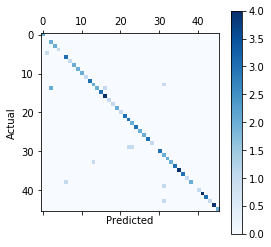

In [25]:
results_error_lda = test_results_lda - true_results

success_rate = np.count_nonzero(results_error_lda == 0) / len(true_results)
print(success_rate)

cm = confusion_matrix(true_results, test_results_lda)

print(cm)
plt.matshow(cm, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

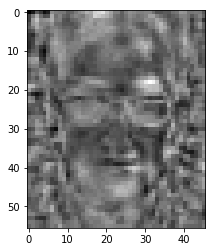

In [26]:
# Generate fisherfaces by converting Wlda back to its original data space

fisherfaces = W_pca.dot(W_lda) # Columns are fisherfaces

plt.imshow(np.reshape(fisherfaces[:,0],(46,56)).T, cmap = 'gist_gray')

# PCA-LDA Ensemble 

In [27]:
sorted_train_data = train_data[:,np.argsort(train_label)]
sorted_train_label = train_label[np.argsort(train_label)]

In [28]:
import random

T = 50
M0 = 10
M1 = 90
# Mpca = M0 + M1 should not exceed 
M_lda = 50
n_sample = 7 # number of samples per class

# Generate random subspaces 
def rand_subspace(eigvecs,eigvals):
    subspace = eigvecs[:,np.argsort(-eigvals)[ : M0]]
    #print(len(eigvals))
    index = (np.argsort(eigvals)[ : len(eigvals) - M0]).tolist()
    rand_index = random.sample(index, M1)  
    subspace = np.concatenate((subspace, eigvecs[:,rand_index]), axis=1)
    return subspace

# Bagging (from every class)
def rand_sample(sorted_train_data,sorted_train_label,counts_train):
    sample = list()
    label = list()
    current_index = 0
    for idx,cnt in enumerate(counts_train):
        for j in range(n_sample):
            index = random.randrange(current_index, current_index + cnt, 1)
            sample.append(sorted_train_data[:,index])
            label.append(sorted_train_label[index])
        current_index += cnt
    
    return ((np.asarray(sample)).T), np.asarray(label)

# Generate eigenspace of data set using PCA
def eigspace_generator_ensemble(data):
    num_train = len(data[0])
    avg_face = data.mean(axis=1)
    num_pix = len(data)
    A = data - avg_face.reshape(num_pix,1)
    S_low_dim = ((A.T).dot(A)) / num_train
    eigvals_low_dim, eigvecs_low_dim = np.linalg.eig(S_low_dim)
    eigvals_low_dim = eigvals_low_dim.real
    eigvecs_low_dim = eigvecs_low_dim.real
    nonzero_eigvals_low_dim = eigvals_low_dim[abs(eigvals_low_dim) >= 1e-7]
    eigvecs_nonzero_eigvals_low_dim = eigvecs_low_dim[:,abs(eigvals_low_dim) >= 1e-7]
    eigfaces_low_dim_unnormalized = A.dot(eigvecs_nonzero_eigvals_low_dim[:,np.argsort(-nonzero_eigvals_low_dim)[:]]) 
    eigfaces_low_dim = (preprocessing.normalize(eigfaces_low_dim_unnormalized.T, norm='l2')).T
    return eigfaces_low_dim, nonzero_eigvals_low_dim


In [29]:
def lda_rand_subspace(W_pca,test_data): # test_data single column vector
    
    Sb_pca = (W_pca.T).dot(Sb.dot(W_pca))
    Sw_pca = (W_pca.T).dot(Sw.dot(W_pca))
    
    eigvals_lda, eigvecs_lda = np.linalg.eig((inv(Sw_pca)).dot(Sb_pca))
    eigvals_lda = eigvals_lda.real
    eigvecs_lda = eigvecs_lda.real

    nonzero_eigvals_lda = eigvals_lda[abs(eigvals_lda) >= 1e-7]
    eigvecs_nonzero_eigvals_lda = eigvecs_lda[:,abs(eigvals_lda) >= 1e-7]
    
    sorted_index_lda = np.argsort(-nonzero_eigvals_lda)[:M_lda]

    W_lda = eigvecs_nonzero_eigvals_lda[:,sorted_index_lda]
    
    # NN-classification

    W_train_pca = (A.T).dot(W_pca)
    W_train_lda = (W_train_pca).dot(W_lda)
    sorted_W_train_lda = W_train_lda[np.argsort(train_label),:]

    A_test_lda = test_data.reshape(num_pix,1) - avg_face.reshape(num_pix,1)

    # Project test data to PCA subspace
    W_test_pca = (A_test_lda.T).dot(W_pca) # Coordinates (row vector) on PCA subspace
    # Project test data to LDA subspace
    W_test_lda = (W_test_pca).dot(W_lda) # Coordinates (row vector) on LDA subspace
    
    distance = np.linalg.norm(W_test_lda - sorted_W_train_lda, axis=1) # row vector containing Euclidiean distance to each tranining data
   
        
    min_distance = []
    current_index = 0;
    for idx,cnt in enumerate(counts_train):
        distance = distance.reshape(len(distance),1)
        distance[current_index : current_index + cnt,:]
        min_distance.append(min(distance[current_index : current_index + cnt,:]))
        current_index += cnt
    
    post_distribution = (min_distance / sum(min_distance)) 
    
    return post_distribution

# Committe machine with randomized feature space

In [30]:
R = [] 
for i in range(T):
    R.append(rand_subspace(eigvecs_nonzero_eigvals,nonzero_eigvals)) # generate T random subspaces

In [31]:
# average

avg_error = []
test_results_ensemble = []

for i in range(len(test_data[0])):
    NN_class = []
    post_distribution = [] # each column vector contains posterior distribution of each model
    
    for j in range(T):
        post_distribution.append(lda_rand_subspace(R[j],test_data[:,i])) # perform lda on each subspaces learnt
        NN_class.append(np.argmin(post_distribution[j]) + 1)
        
    index = np.argmin(sum(post_distribution) / T) + 1
    test_results_ensemble.append(index)
    avg_error.append(np.count_nonzero(NN_class -  true_results[i] != 0) / len(NN_class))
    print(test_results_ensemble)

[46]
[46, 51]
[46, 51, 14]
[46, 51, 14, 20]
[46, 51, 14, 20, 35]
[46, 51, 14, 20, 35, 34]
[46, 51, 14, 20, 35, 34, 13]
[46, 51, 14, 20, 35, 34, 13, 21]
[46, 51, 14, 20, 35, 34, 13, 21, 43]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44, 6]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44, 6, 27]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44, 6, 27, 16]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44, 6, 27, 16, 42]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44, 6, 27, 16, 42, 41]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44, 6, 27, 16, 42, 41, 33]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44, 6, 27, 16, 42, 41, 33,

[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44, 6, 27, 16, 42, 41, 33, 29, 42, 35, 34, 7, 34, 8, 4, 48, 11, 15, 51, 15, 25, 11, 52, 8, 42, 40, 49, 50, 51, 37, 16, 21, 48, 20, 48, 1, 32, 30, 23, 45, 4, 38, 6, 31, 20, 10, 5, 37, 37, 40, 47, 21]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44, 6, 27, 16, 42, 41, 33, 29, 42, 35, 34, 7, 34, 8, 4, 48, 11, 15, 51, 15, 25, 11, 52, 8, 42, 40, 49, 50, 51, 37, 16, 21, 48, 20, 48, 1, 32, 30, 23, 45, 4, 38, 6, 31, 20, 10, 5, 37, 37, 40, 47, 21, 16]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44, 6, 27, 16, 42, 41, 33, 29, 42, 35, 34, 7, 34, 8, 4, 48, 11, 15, 51, 15, 25, 11, 52, 8, 42, 40, 49, 50, 51, 37, 16, 21, 48, 20, 48, 1, 32, 30, 23, 45, 4, 38, 6, 31, 20, 10, 5, 37, 37, 40, 47, 21, 16, 9]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44, 6, 27, 16, 42, 41, 33, 29, 42, 35, 34, 7, 34, 8, 4, 48, 11, 15, 51, 15, 25, 11, 52, 8, 42, 40, 49, 50, 51, 37, 16, 21, 48, 20, 48, 1, 32, 30, 23, 45, 4, 38, 6, 31, 20, 

[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44, 6, 27, 16, 42, 41, 33, 29, 42, 35, 34, 7, 34, 8, 4, 48, 11, 15, 51, 15, 25, 11, 52, 8, 42, 40, 49, 50, 51, 37, 16, 21, 48, 20, 48, 1, 32, 30, 23, 45, 4, 38, 6, 31, 20, 10, 5, 37, 37, 40, 47, 21, 16, 9, 1, 15, 8, 42, 36, 32, 29, 27, 39, 12, 29, 26, 31, 21, 6, 40, 51, 11, 33, 32, 30, 34, 38, 41, 49, 31]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44, 6, 27, 16, 42, 41, 33, 29, 42, 35, 34, 7, 34, 8, 4, 48, 11, 15, 51, 15, 25, 11, 52, 8, 42, 40, 49, 50, 51, 37, 16, 21, 48, 20, 48, 1, 32, 30, 23, 45, 4, 38, 6, 31, 20, 10, 5, 37, 37, 40, 47, 21, 16, 9, 1, 15, 8, 42, 36, 32, 29, 27, 39, 12, 29, 26, 31, 21, 6, 40, 51, 11, 33, 32, 30, 34, 38, 41, 49, 31, 24]
[46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44, 6, 27, 16, 42, 41, 33, 29, 42, 35, 34, 7, 34, 8, 4, 48, 11, 15, 51, 15, 25, 11, 52, 8, 42, 40, 49, 50, 51, 37, 16, 21, 48, 20, 48, 1, 32, 30, 23, 45, 4, 38, 6, 31, 20, 10, 5, 37, 37, 40, 47, 21, 16, 9, 1, 15, 8, 4

0.18269230769230768
0.39903846153846156
0.8173076923076923


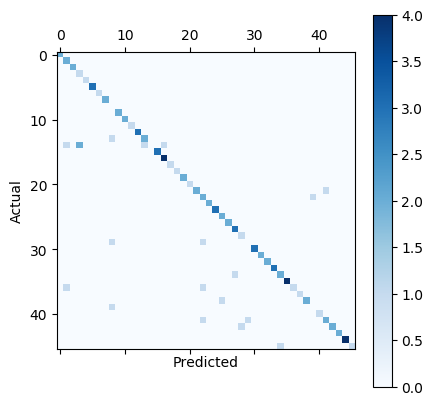

In [45]:
results_error = test_results_ensemble - true_results

error_rate = np.count_nonzero(results_error != 0) / len(results_error)
success_rate = np.count_nonzero(results_error == 0) / len(results_error)
print(error_rate)
print(np.mean(avg_error))
print(success_rate)

cm = confusion_matrix(true_results, test_results_ensemble)

#print(cm)
plt.matshow(cm, cmap = 'Blues')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [43]:
test_results_ensemble = [46, 51, 14, 20, 35, 34, 13, 21, 43, 29, 4, 25, 4, 41, 44, 6, 27, 16, 42, 41, 33, 29, 42, 35, 34, 7, 34, 8, 4, 48, 11, 15, 51, 15, 25, 11, 52, 8, 42, 40, 49, 50, 51, 37, 16, 21, 48, 20, 48, 1, 32, 30, 23, 45, 4, 38, 6, 31, 20, 10, 5, 37, 37, 40, 47, 21, 16, 9, 1, 15, 8, 42, 36, 32, 29, 27, 39, 12, 29, 26, 31, 21, 6, 40, 51, 11, 33, 32, 30, 34, 38, 41, 49, 31, 24, 12, 10, 45, 5, 29, 39, 21, 50, 13]

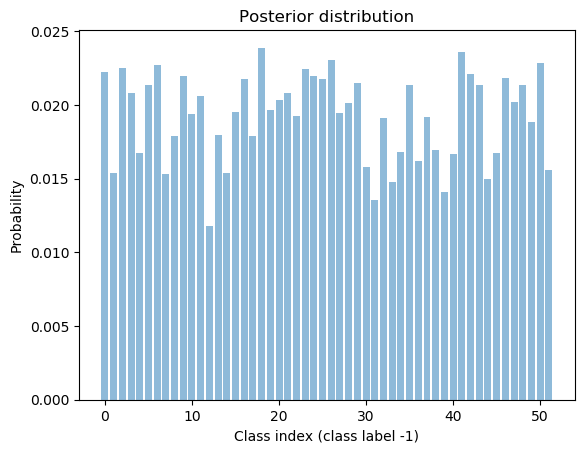

In [33]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ()
for i in range(52):
    objects += (i+1,)
y_pos = np.arange(len(objects))
performance = post_distribution[0].reshape(52,)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.xlabel('Class index (class label -1)')
plt.ylabel('Probability')
plt.title('Posterior distribution')
 
plt.show()

In [34]:
def product(l):
    p = 1
    for i in l:
        p = p*i
    return p

# product

test_results_ensemble = []
for i in range(1):
    post_distribution = [] # each column vector contains posterior distribution of each model
    
    for j in range(T):
        post_distribution.append(lda_rand_subspace(R[j],test_data[:,i])) # perform lda on each subspaces learnt

    index = np.argmin(product(post_distribution) / T) + 1
    test_results_ensemble.append(index)
    print(test_results_ensemble)

[46]


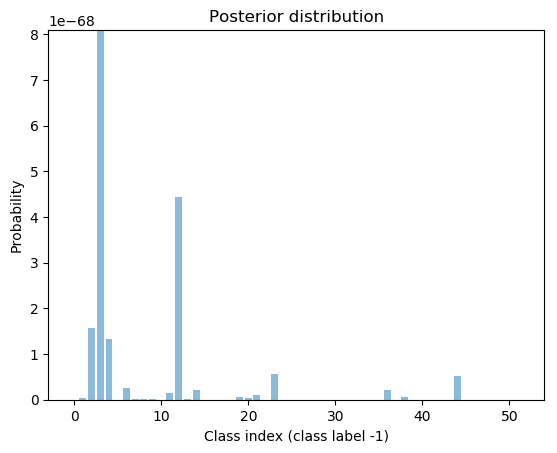

In [35]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ()
for i in range(52):
    objects += (i+1,)
y_pos = np.arange(len(objects))
performance = ((product(post_distribution) / T).reshape(52,))*1e16
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.xlabel('Class index (class label -1)')
plt.ylabel('Probability')
plt.title('Posterior distribution')
 
plt.show()